# Problem:

What factors could effect Gross in the dataset?
Hypothesis: There are 2 factors that affect Gross
1: Budget
2: Company
Questions: 
1: Does Budget affect positive gross?
2: There is a linear regression relationship between them? 3: And how could budget change gross?
4: Does Company affect gross?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)# Adjust the configuration of the plots we will create

#read in the data
df=pd.read_csv('/Users/honghanh/Downloads/movies.csv')



## 1: Data Cleaning

In [2]:
# Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Let's see if there is any thing missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
#Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df.dropna(inplace=True)

In [7]:
# change data types of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
# Drop any duplicates
 
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


## 2: Correlation Analysis

### 2.1: Testing Normal Distribution

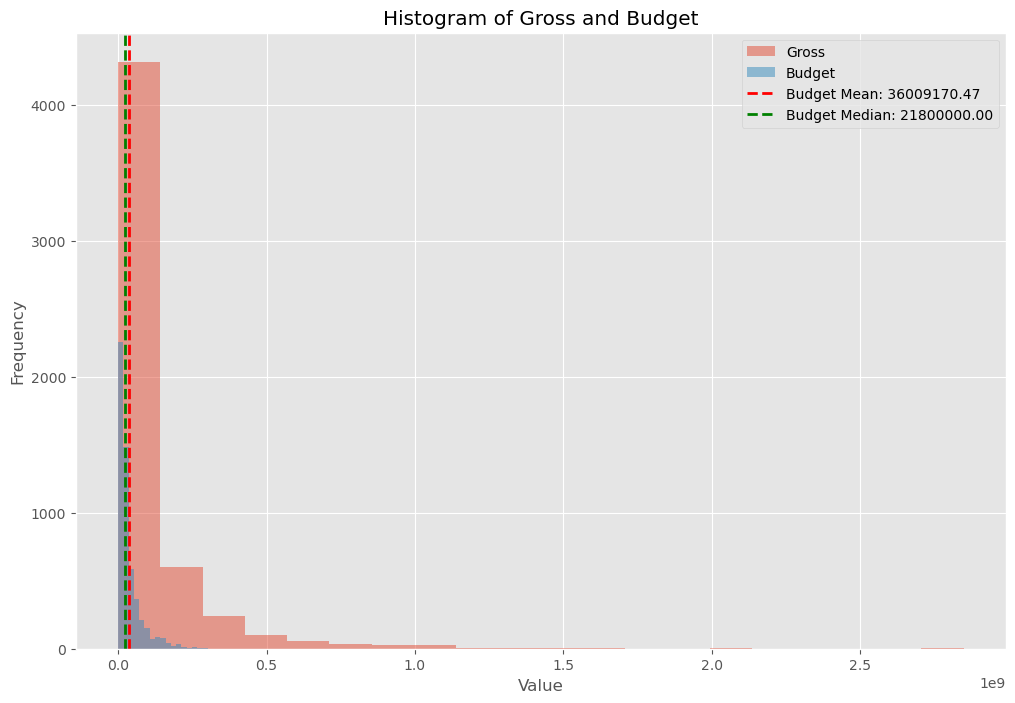

In [9]:
#histogram with budget versus gross

gross_data = df['gross']
budget_data = df['budget']

mean_budget = np.mean(budget_data)
median_budget = np.median(budget_data)


plt.hist(gross_data, bins=20, alpha=0.5, label='Gross')
plt.hist(budget_data, bins=20, alpha=0.5, label='Budget')

plt.axvline(mean_budget, color='red', linestyle='dashed', linewidth=2, label=f'Budget Mean: {mean_budget:.2f}')
plt.axvline(median_budget, color='green', linestyle='dashed', linewidth=2, label=f'Budget Median: {median_budget:.2f}')

plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend(loc='upper right')
plt.title('Histogram of Gross and Budget')
plt.show()

In [10]:
# Testing Normal Distribution by Shapiro Wilk method

from scipy.stats import shapiro

gross_data = df['gross']
budget_data = df['budget']

statistic_gross, p_value_gross = shapiro(gross_data)
print(f'Shapiro-Wilk Test for Gross:\nStatistic = {statistic_gross}, p-value = {p_value_gross}')

statistic_budget, p_value_budget = shapiro(budget_data)
print(f'Shapiro-Wilk Test for Budget:\nStatistic = {statistic_budget}, p-value = {p_value_budget}')

Shapiro-Wilk Test for Gross:
Statistic = 0.5399124622344971, p-value = 0.0
Shapiro-Wilk Test for Budget:
Statistic = 0.7315428256988525, p-value = 0.0


/Users/honghanh/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### => Gross and Budget do not follow normal distribution

### 2.2: Testing Linear Regression

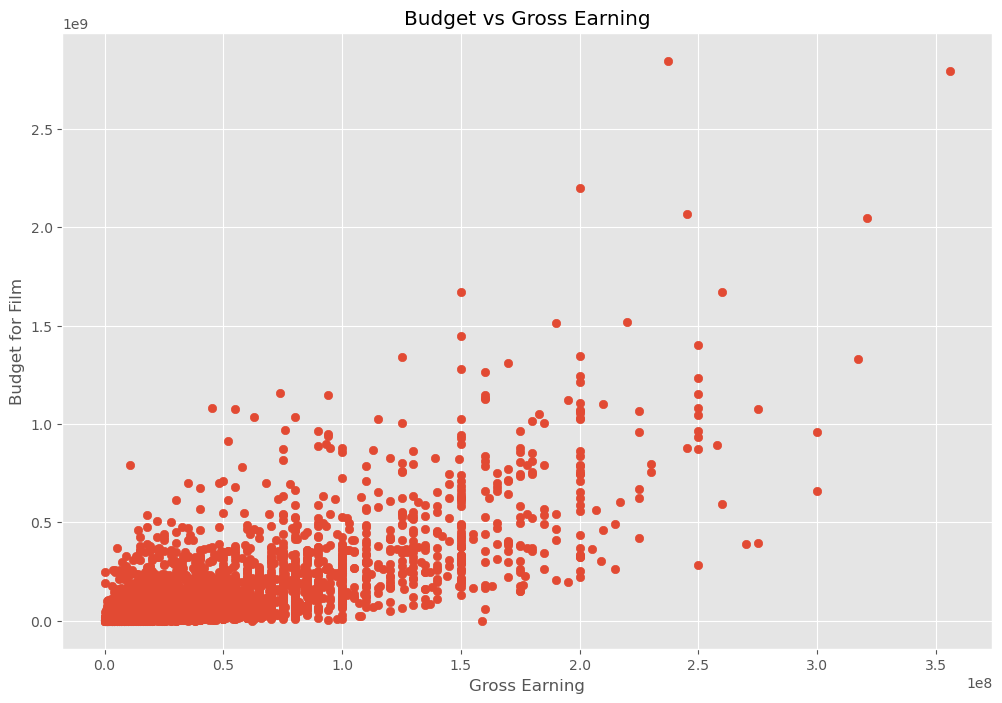

In [12]:
#scatter plot with budget vesus grosss

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')
plt.show()


### => There is no linear regression relationship betweeen Gross and Budget

### 2.3: Calculating correlation coefficients

In [13]:
# Let's start looking at correlation 

numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr(method = 'spearman')
print(correlation_matrix)


             year     score     votes    budget     gross   runtime
year     1.000000  0.057741  0.427623  0.312886  0.351045  0.095444
score    0.057741  1.000000  0.495409 -0.009971  0.183192  0.412155
votes    0.427623  0.495409  1.000000  0.493461  0.745793  0.300621
budget   0.312886 -0.009971  0.493461  1.000000  0.692958  0.330794
gross    0.351045  0.183192  0.745793  0.692958  1.000000  0.257400
runtime  0.095444  0.412155  0.300621  0.330794  0.257400  1.000000


#### corr(budget-gross) =.69 => budget has a positive effect on gross

## 3: Anova analysis

### 3.1: Homogeneity of Variance

In [14]:
import scipy.stats as stats

grouped_data = [df['gross'][df['company'] == company] for company in df['company'].unique()]
statistic, p_value = stats.levene(*grouped_data)
print(f'Statistic = {statistic:.4f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print('reject Ho')
else:
    print('accept Ho -> Phương sai đồng nhất')

Statistic = 0.7089, p-value = 1.0000
accept Ho -> Phương sai đồng nhất


### 3.2: Anova statistic

In [15]:
from scipy.stats import f_oneway

groups = []
for company_name, group_data in df.groupby('company'):
    groups.append(group_data['gross'])

f_statistic, p_value = f_oneway(*groups)

print(f'F-statistic: {f_statistic}')
print(f'p-value: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print('reject Ho -> Có sự tác động.')
else:
    print('accept Ho.')

F-statistic: 1.4806813328874362
p-value: 4.327561282383927e-21
reject Ho -> Có sự tác động.


## 4: Conclusion

1: "Budget" has a positive effect on gross but has no linear regression relationship between them.
2: "Company" effects on gross